In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob as gb
import ast

"""
FULL TEXT
ALPHA TUNING
VEM_fix
"""

'\nFULL TEXT\nALPHA TUNING\nVEM_fix\n'

State: (C_P,tw:15,k:18,sigma_a)
(' - Max alpha     :', 1.5)
(' - Max alpha[:-1]:', 1.5)
--------------------------
State: (C_P,tw:0,k:34,sigma_m)
(' - Max alpha     :', 0.5)
(' - Max alpha[:-1]:', 0.5)
--------------------------
State: (UCI,tw:10,k:14,sigma_a)
(' - Max alpha     :', 2.0)
(' - Max alpha[:-1]:', 2.0)
--------------------------
State: (NPMI,tw:10,k:14,sigma_a)
(' - Max alpha     :', 2.0)
(' - Max alpha[:-1]:', 2.0)
--------------------------
State: (C_V,tw:10,k:18,sigma_a)
(' - Max alpha     :', 0.5)
(' - Max alpha[:-1]:', 0.5)
--------------------------
State: (C_A,tw:10,k:42,sigma_a)
(' - Max alpha     :', 0.80000000000000004)
(' - Max alpha[:-1]:', 0.80000000000000004)
--------------------------
State: (UMASS,tw:10,k:14,sigma_a)
(' - Max alpha     :', 10.0)
(' - Max alpha[:-1]:', 0.10000000000000001)
--------------------------


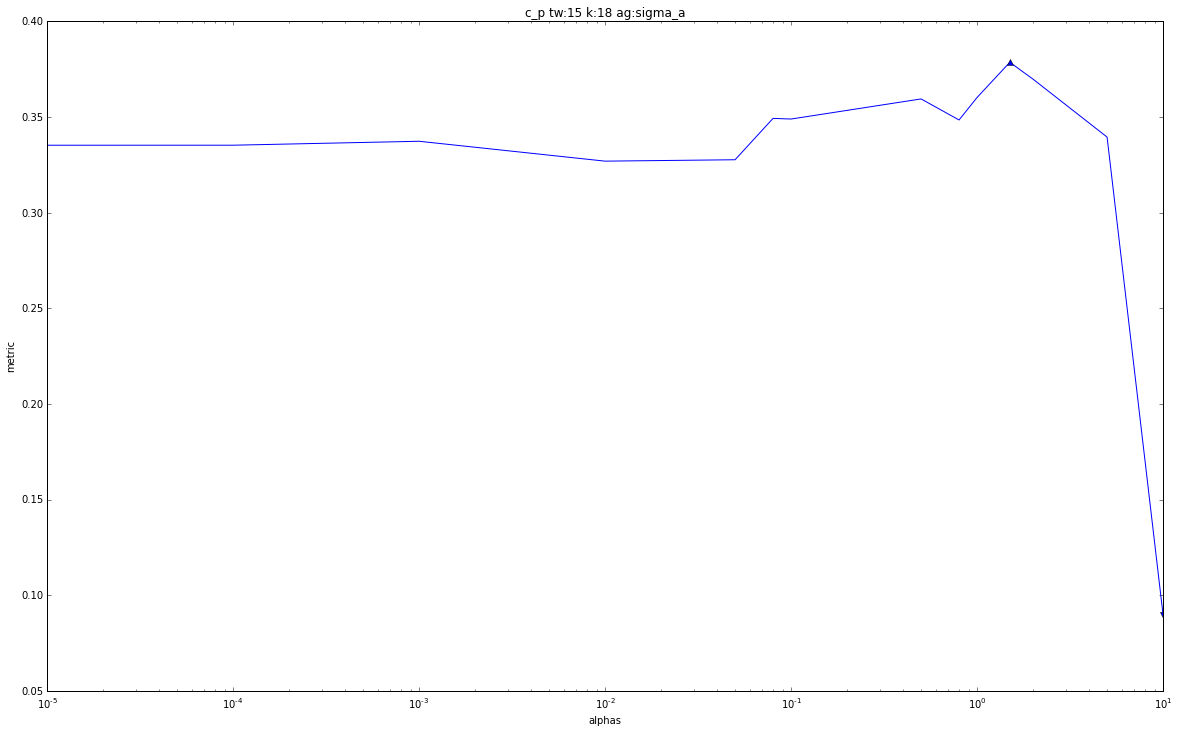

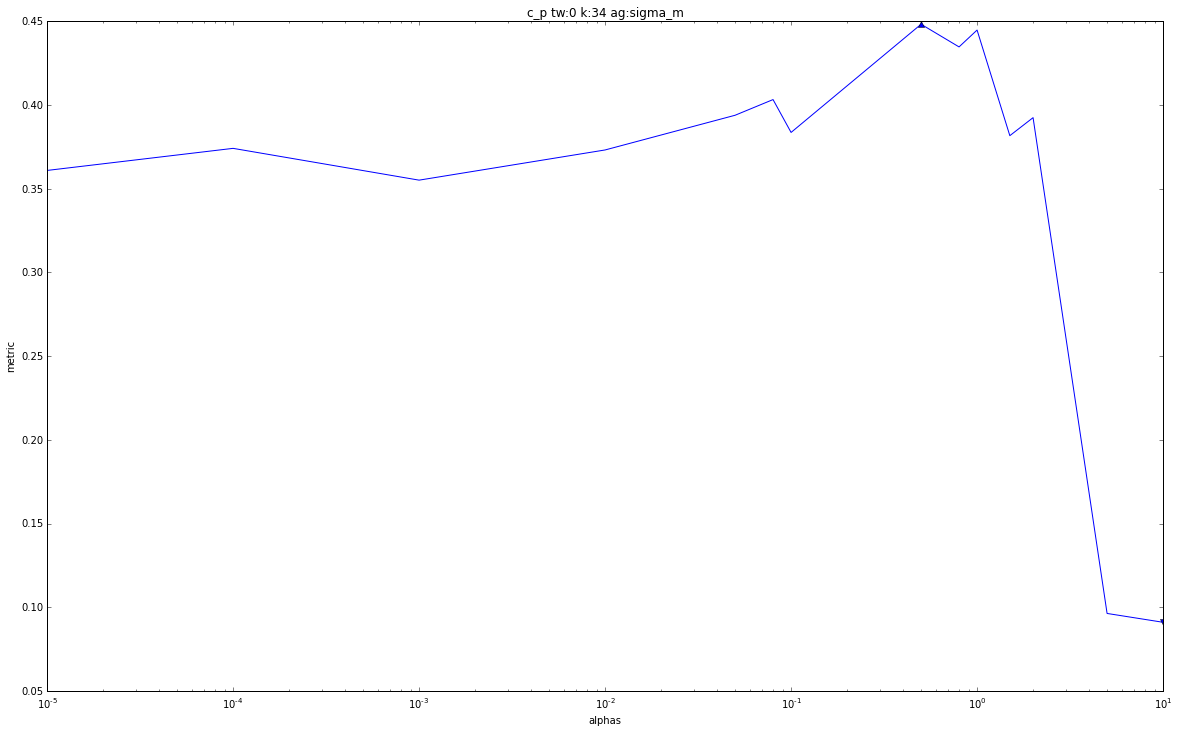

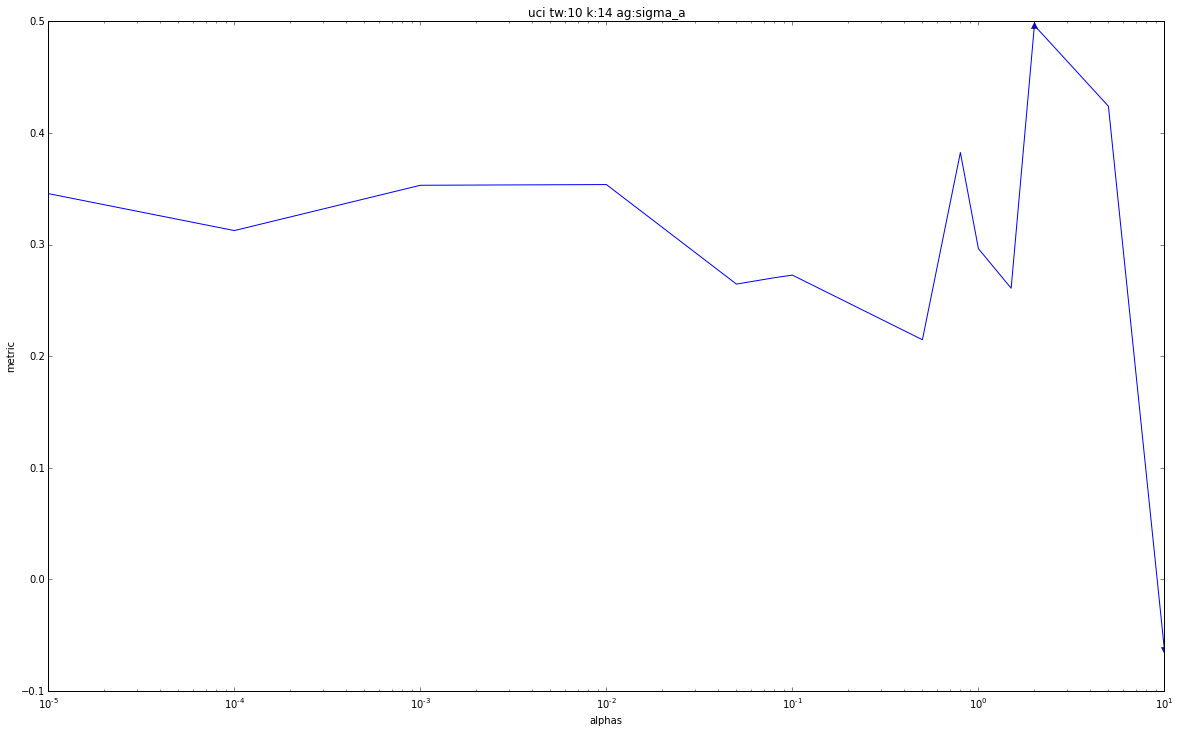

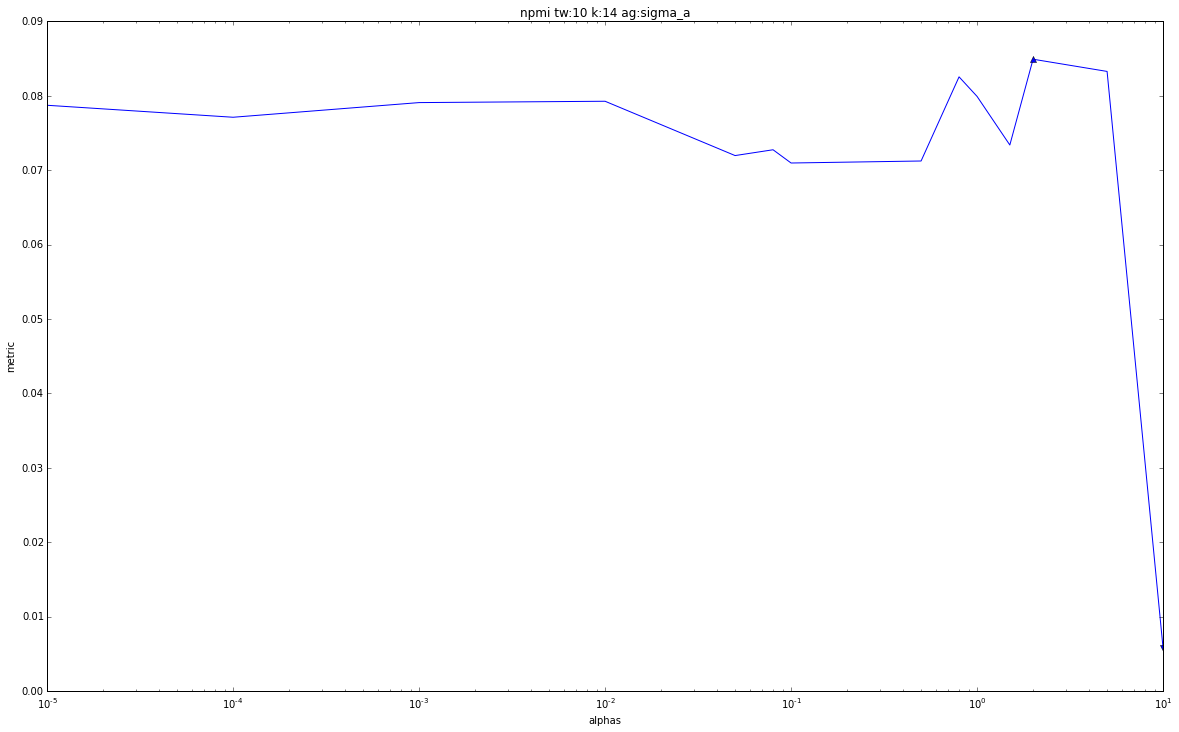

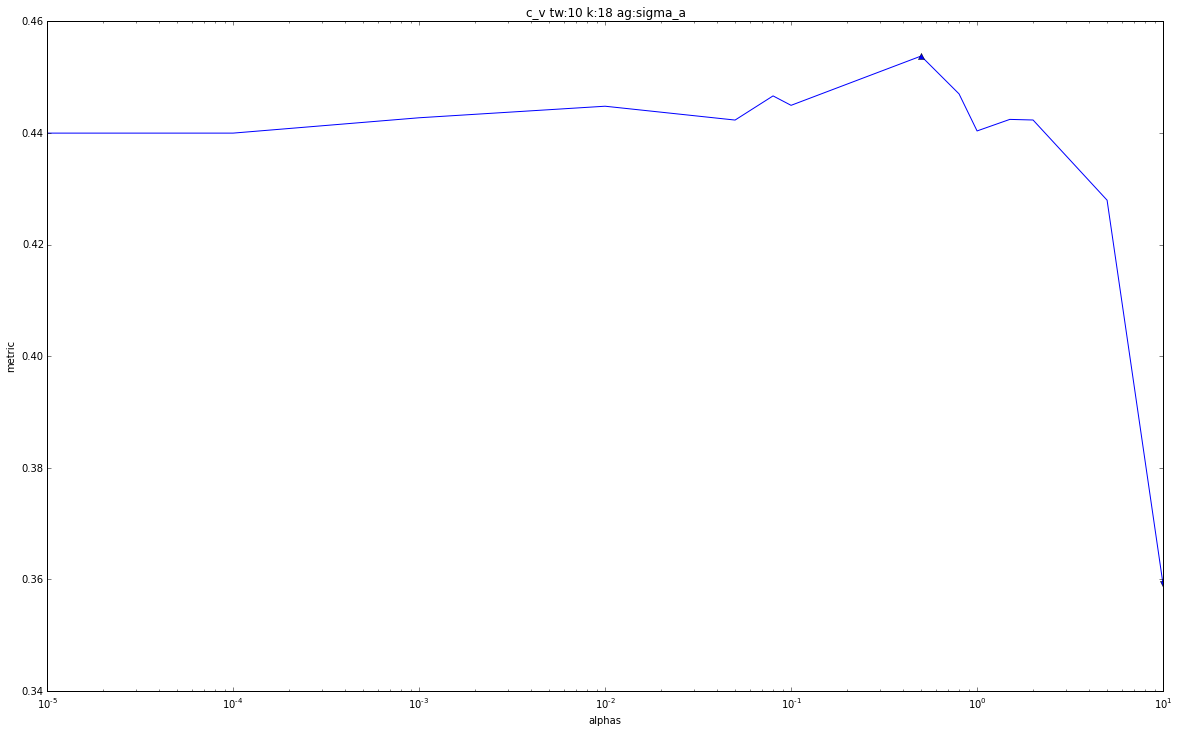

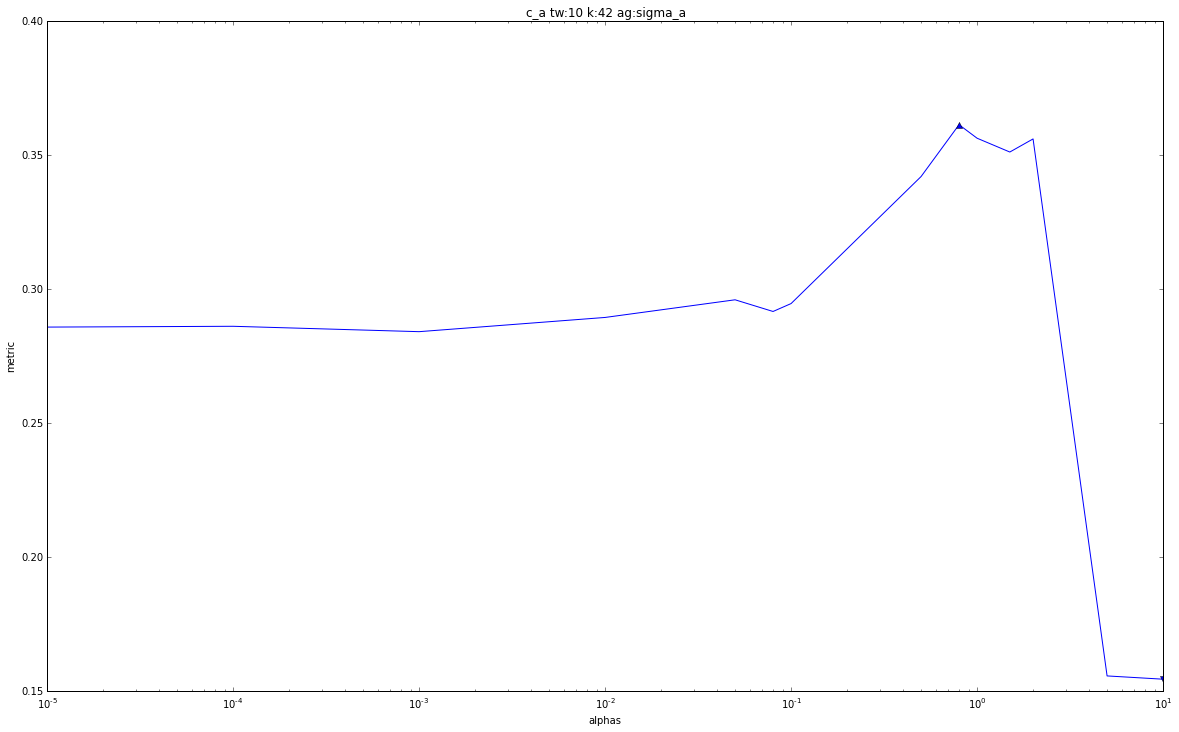

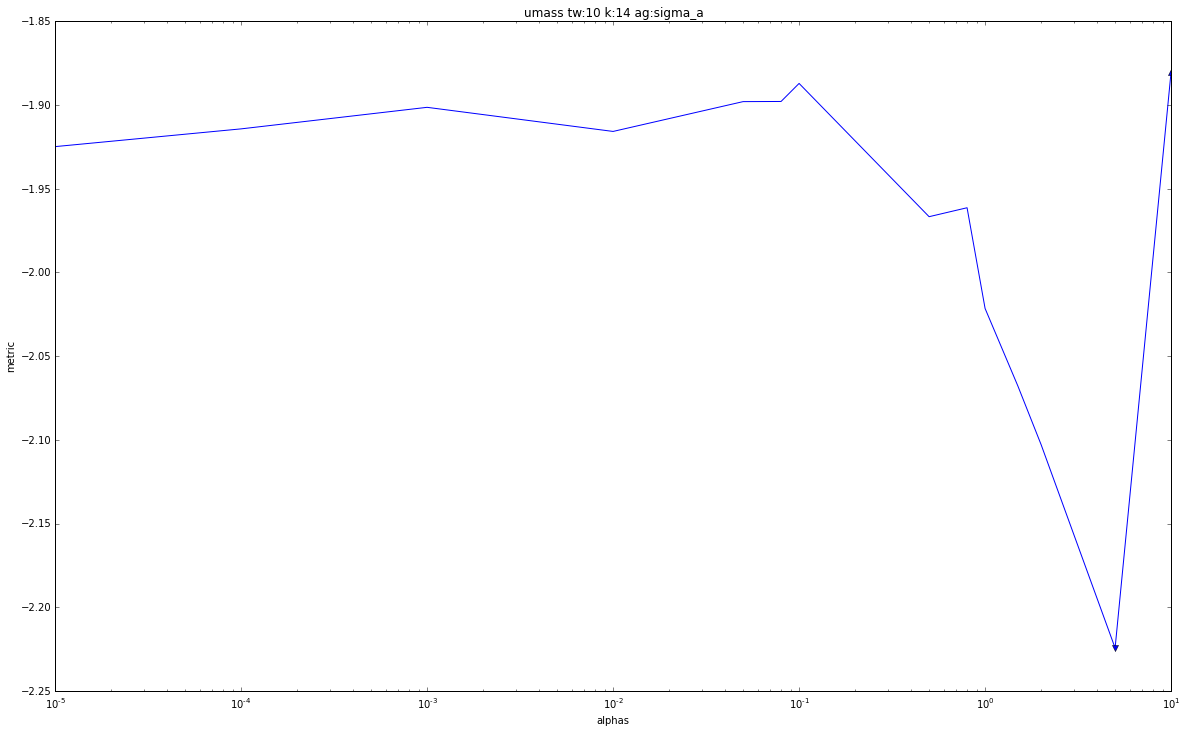

In [5]:
for file in gb.glob('*'):
    if 'plot_' in file:
        continue
        
    temp = file.split('_')
    if temp[0]=='c':
        temp=temp[1:]
    k = int(temp[1])
    tw = int(temp[2])
    agg = '_'.join(temp[3:])
    handler = open(file)

    line1 = handler.readline().strip('\n')
    fool,alphas = line1.split('=')
    alphas = np.array(ast.literal_eval(alphas))

    line2 = handler.readline().strip('\n')
    score,vals = line2.split('=')
    vals = np.array(ast.literal_eval(vals))
    
    plt.figure(figsize=(20,12))
    plt.plot(alphas,vals,'b')
    plt.plot(alphas[vals.argmin()], vals.min(), 'v', color='b')
    plt.plot(alphas[vals.argmax()], vals.max(), '^', color='b')
    plt.xscale('log')
    plt.xlabel("alphas")
    plt.ylabel("metric")
    plt.title("%s tw:%i k:%i ag:%s" % (score,tw,k,agg))
    print("State: (%s,tw:%i,k:%i,%s)"% (score.upper(),tw,k,agg))
    print(" - Max alpha     :", alphas[vals.argmax()])
    print(" - Max alpha[:-1]:", alphas[vals[:-1].argmax()])
    print("--------------------------")